In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
import string
import missingno
import time
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize
#nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn import metrics
df = pd.read_csv("Mental-Health-Twitter.csv")
df1 = pd.read_csv("Mental-Health-Twitter.csv")

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [3]:
df1.isnull().sum()

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64


<AxesSubplot:>

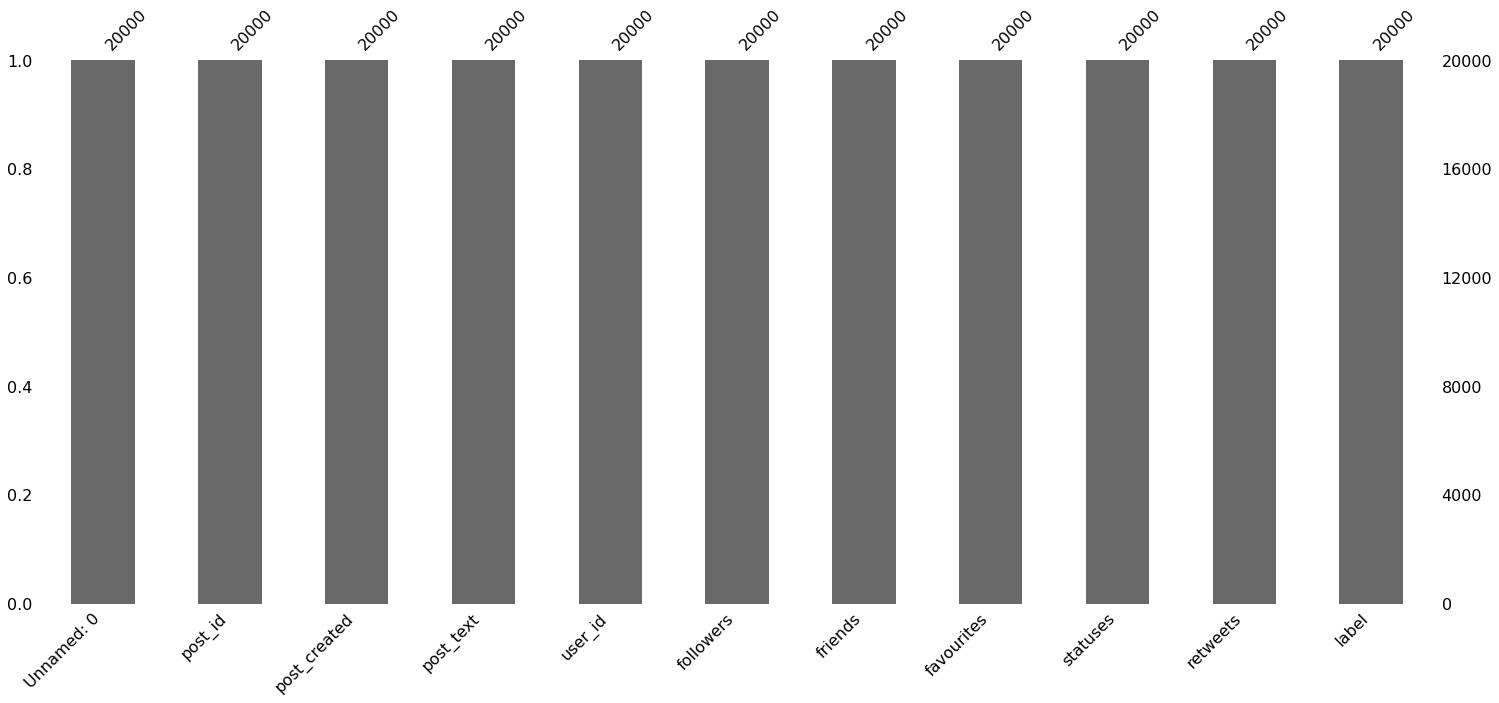

In [4]:
print(df.isna().sum())
missingno.bar(df)

<AxesSubplot:>

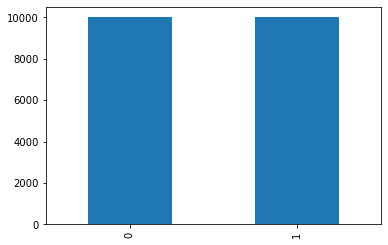

In [5]:
df1['label'].value_counts().plot.bar()

1    54
0    18
Name: label, dtype: int64

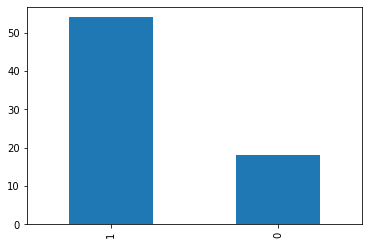

In [6]:
df1 = df1.drop_duplicates(subset='user_id', keep='first')

df1['label'].value_counts().plot.bar()
df1['label'].value_counts()

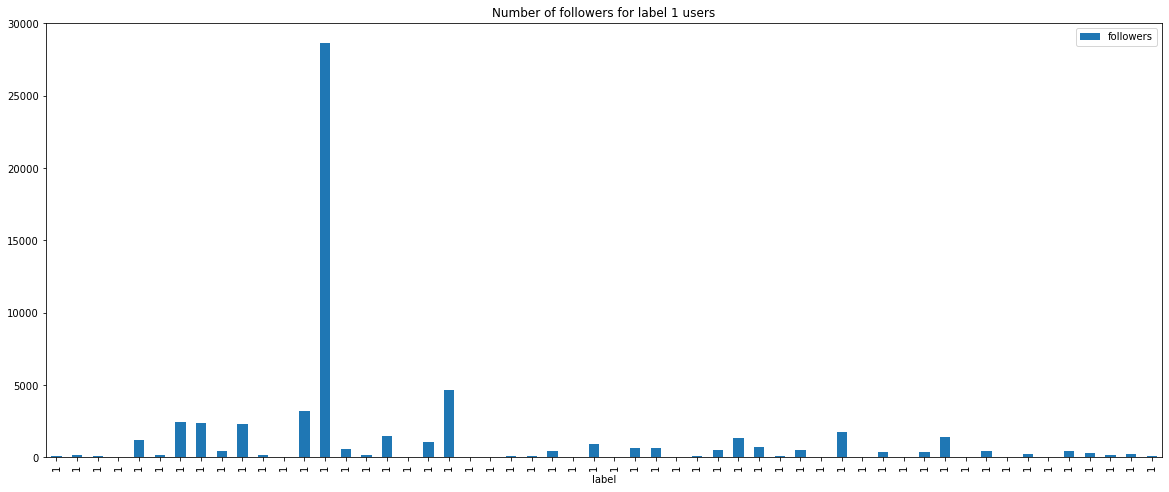

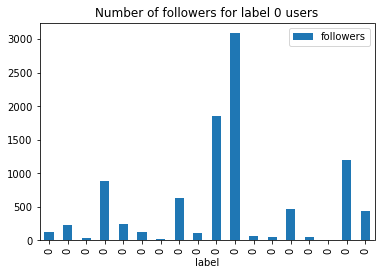

In [42]:
df1.head(54).plot(figsize = (20,8),kind='bar',x='label', y='followers')
plt.title('Number of followers for label 1 users')
plt.show()
df1.tail(18).plot(kind='bar',x='label', y='followers')
plt.title('Number of followers for label 0 users')
plt.show()
#plt.bar(df1.friends,df1.user_id)
#plt.show()

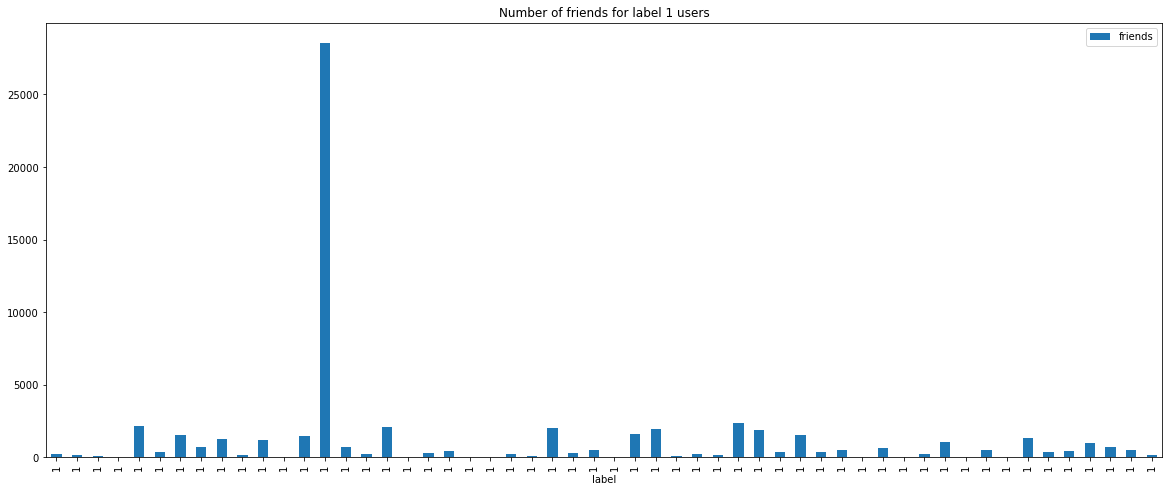

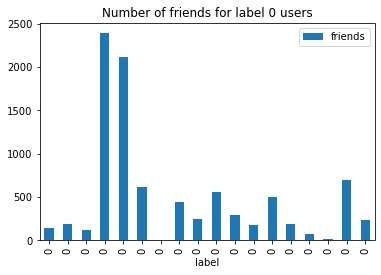

In [43]:
df1.head(54).plot(figsize = (20,8),kind='bar',x='label', y='friends')
plt.title('Number of friends for label 1 users')
plt.show()
df1.tail(18).plot(kind='bar',x='label', y='friends')
plt.title('Number of friends for label 0 users')
plt.show()

Text(0.5, 1.0, 'Word Count')

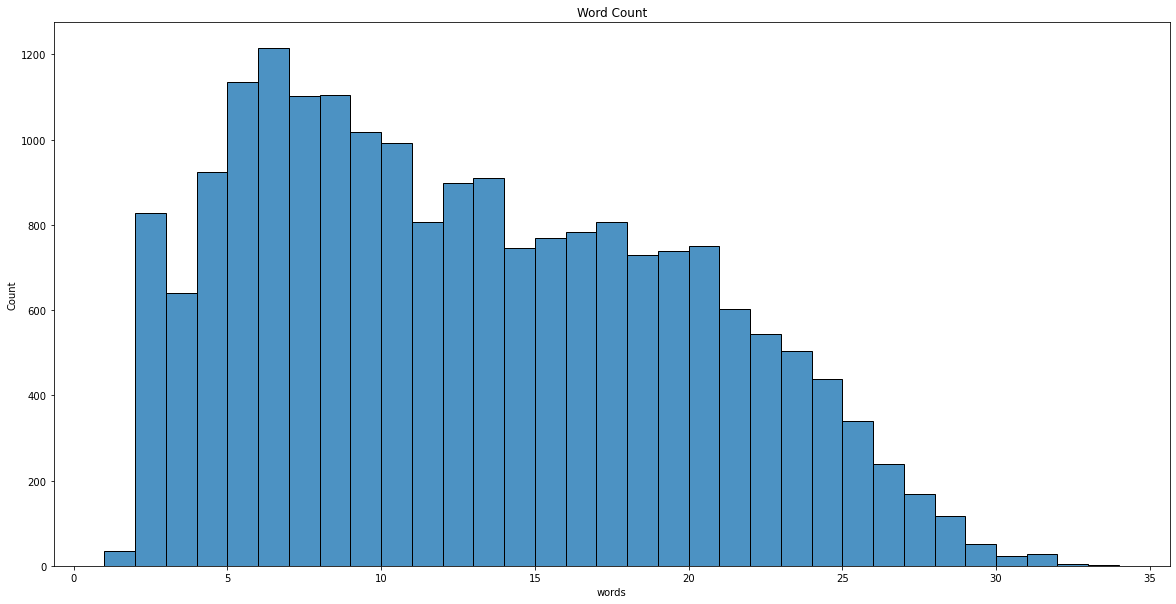

In [9]:
df['words'] = df['post_text'].apply(lambda x: len(x.split()))
plt.figure(figsize = (20,10))
#plt.hist(df['words'], 35, histtype='bar', stacked=True, label=df['label'])
sns.histplot(df['words'], bins = range(1, 35, 1), alpha = 0.8)
plt.title('Word Count')

In [10]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop(columns=df.columns[1], axis=1, inplace=True)
tweets = df.post_text

In [11]:
sentence_1 = []
for sentence in tweets:
    sentence=sentence.lower()
    sentence = re.sub(r"http\S+|www\S+|https\S+", '', sentence, flags=re.MULTILINE)
    tweets_a = re.findall("[a-z]+", sentence)
    sent = " ".join(tweets_a)
    sentence_1.append(sent)

In [12]:
stop_words = set(stopwords.words('english'))
sentence_2 = []
for sentence in sentence_1:
    word_tokens = word_tokenize(sentence)
    words = [w for w in word_tokens if not w in stop_words]
    sent = " ".join(words)
    sentence_2.append(sent)

In [13]:
lemmatizer = WordNetLemmatizer()
sentences = []
for sentence in sentence_2:
    word_list = nltk.word_tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    sentences.append(lemmatized_output)

In [14]:
tfidfvectorizer = TfidfVectorizer(max_features=1000,stop_words="english")
vectors = tfidfvectorizer.fit_transform(sentences).toarray()

In [15]:
X2 = vectors
Y = df['label'].values
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.2, random_state=35)

In [16]:
initial_time=time.time()
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X2_train, Y2_train)
Y2_preds_dtc = dtc.predict(X2_test)
end_time=time.time()
time_dtc=end_time-initial_time
print(time_dtc)

16.949828147888184


In [17]:
print("---Confusion matrix of Decision Tree Classifier without k-fold cross validation---")
CM = confusion_matrix(Y2_test, Y2_preds_dtc)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(TN)
print(FP)
print(FN)
print(TP)
accuracy_dtc=(TN+TP)/(TN+TP+FN+FP)
precision_dtc=TP/(TP+FP)
recall_dtc=TP/(TP+FN)
f1_score_dtc=(2*(precision_dtc*recall_dtc))/(precision_dtc+recall_dtc)
print(CM)
print("---Classification Report of Decsion Tree Classifier without k-fold cross validation---")
print(classification_report(Y2_test, Y2_preds_dtc))

---Confusion matrix of Decision Tree Classifier without k-fold cross validation---
1576
433
490
1501
[[1576  433]
 [ 490 1501]]
---Classification Report of Decsion Tree Classifier without k-fold cross validation---
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2009
           1       0.78      0.75      0.76      1991

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



In [18]:
scoring_dtc = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
initial_time=time.time()
dtc = DecisionTreeClassifier()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
#score_d = cross_val_score(dtc, X2, Y, cv=cv)
score_d = cross_validate(dtc, X2, Y, cv=cv, scoring=scoring_dtc)
end_time=time.time()
time_dtc_kfold=end_time-initial_time
print(time_dtc_kfold)
print(np.mean(score_d['test_accuracy']))

90.44258093833923
0.75915


In [19]:
initial_time=time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X2_train, Y2_train)
Y2_preds_knn = knn.predict(X2_test)
end_time=time.time()
time_knn=end_time-initial_time
print(time_knn)

1.996196985244751


In [20]:
print("---Confusion matrix of kNN classifier without k-fold cross validation---")
CM = confusion_matrix(Y2_test, Y2_preds_knn)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(TN)
print(FP)
print(FN)
print(TP)
accuracy_knn=(TN+TP)/(TN+TP+FN+FP)
precision_knn=TP/(TP+FP)
recall_knn=TP/(TP+FN)
f1_score_knn=(2*(precision_knn*recall_knn))/(precision_knn+recall_knn)
print(CM)
print("---Classification Report of kNN classifier without k-fold cross validation---")
print(classification_report(Y2_test, Y2_preds_knn))

---Confusion matrix of kNN classifier without k-fold cross validation---
1631
378
794
1197
[[1631  378]
 [ 794 1197]]
---Classification Report of kNN classifier without k-fold cross validation---
              precision    recall  f1-score   support

           0       0.67      0.81      0.74      2009
           1       0.76      0.60      0.67      1991

    accuracy                           0.71      4000
   macro avg       0.72      0.71      0.70      4000
weighted avg       0.72      0.71      0.70      4000



In [21]:
scoring_knn = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
initial_time=time.time()
knn = KNeighborsClassifier(n_neighbors=5)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
score_knn = cross_validate(knn, X2, Y, cv=cv, scoring=scoring_knn)
end_time=time.time()
time_knn_kfold=end_time-initial_time
print(time_knn_kfold)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (score_knn.mean(), score_knn.std()))
print(np.mean(score_knn['test_accuracy']))

11.33510684967041
0.7023999999999999


In [22]:
initial_time=time.time()
svm = SVC(kernel='linear', random_state=0)
svm = svm.fit(X2_train, Y2_train)
Y2_preds_svm = svm.predict(X2_test)
end_time=time.time()
time_svm=end_time-initial_time
print(time_svm)

64.23235893249512


In [23]:
print("---Confusion matrix of SVM classifier without k-fold cross validation---")
CM = confusion_matrix(Y2_test, Y2_preds_svm)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(TN)
print(FP)
print(FN)
print(TP)
accuracy_svm=(TN+TP)/(TN+TP+FN+FP)
precision_svm=TP/(TP+FP)
recall_svm=TP/(TP+FN)
f1_score_svm=(2*(precision_svm*recall_svm))/(precision_svm+recall_svm)
print(CM)
print("---Classification Report of SVM classifier without k-fold cross validation---")
print(classification_report(Y2_test, Y2_preds_svm))

---Confusion matrix of SVM classifier without k-fold cross validation---
1549
460
457
1534
[[1549  460]
 [ 457 1534]]
---Classification Report of SVM classifier without k-fold cross validation---
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2009
           1       0.77      0.77      0.77      1991

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



In [24]:
scoring_svm = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
initial_time=time.time()
svm = SVC(kernel='linear', random_state=0)  
cv = KFold(n_splits=5, shuffle=True, random_state=1)
score_svm = cross_validate(svm, X2, Y, cv=cv, scoring=scoring_svm)
end_time=time.time()
time_svm_kfold=end_time-initial_time
print(time_svm_kfold)
print(np.mean(score_svm['test_accuracy']))

224.20218205451965
0.7726


In [25]:
initial_time=time.time()
gnb = GaussianNB()
gnb = gnb.fit(X2_train, Y2_train)
Y2_preds_gnb = gnb.predict(X2_test)
end_time=time.time()
time_gnb=end_time-initial_time
print(time_gnb)

0.19103574752807617


In [26]:
print("---Confusion matrix of Gaussian Naive Bayes classifier without k-fold cross validation---")
CM = confusion_matrix(Y2_test, Y2_preds_gnb)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(TN)
print(FP)
print(FN)
print(TP)
accuracy_gnb=(TN+TP)/(TN+TP+FN+FP)
precision_gnb=TP/(TP+FP)
recall_gnb=TP/(TP+FN)
f1_score_gnb=(2*(precision_gnb*recall_gnb))/(precision_gnb+recall_gnb)
print(CM)
print("---Classification Report of Gaussian Naive Bayes classifier without k-fold cross validation---")
print(classification_report(Y2_test, Y2_preds_gnb))

---Confusion matrix of Gaussian Naive Bayes classifier without k-fold cross validation---
1202
807
190
1801
[[1202  807]
 [ 190 1801]]
---Classification Report of Gaussian Naive Bayes classifier without k-fold cross validation---
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      2009
           1       0.69      0.90      0.78      1991

    accuracy                           0.75      4000
   macro avg       0.78      0.75      0.75      4000
weighted avg       0.78      0.75      0.74      4000



In [27]:
scoring_gnb = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
initial_time=time.time()
gnb = GaussianNB()
cv = KFold(n_splits=5, shuffle=True, random_state=1)
score_gnb = cross_validate(gnb, X2, Y, cv=cv, scoring=scoring_gnb)
end_time=time.time()
time_gnb_kfold=end_time-initial_time
print(time_gnb_kfold)
print(np.mean(score_gnb['test_accuracy']))

0.5893990993499756
0.75295


In [28]:
initial_time=time.time()
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X2_train, Y2_train)
Y2_preds_rfc = rfc.predict(X2_test)
end_time=time.time()
time_rfc=end_time-initial_time
print(time_rfc)

0.797720193862915


In [29]:
print("---Confusion matrix of Random forest classifier without k-fold cross validation---")
CM = confusion_matrix(Y2_test, Y2_preds_rfc)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
print(TN)
print(FP)
print(FN)
print(TP)
accuracy_rfc=(TN+TP)/(TN+TP+FN+FP)
precision_rfc=TP/(TP+FP)
recall_rfc=TP/(TP+FN)
f1_score_rfc=(2*(precision_rfc*recall_rfc))/(precision_rfc+recall_rfc)
print(CM)
print("---Classification Report of Random forest classifier without k-fold cross validation---")
print(classification_report(Y2_test, Y2_preds_rfc))

---Confusion matrix of Random forest classifier without k-fold cross validation---
677
1332
76
1915
[[ 677 1332]
 [  76 1915]]
---Classification Report of Random forest classifier without k-fold cross validation---
              precision    recall  f1-score   support

           0       0.90      0.34      0.49      2009
           1       0.59      0.96      0.73      1991

    accuracy                           0.65      4000
   macro avg       0.74      0.65      0.61      4000
weighted avg       0.75      0.65      0.61      4000



In [30]:
scoring_rfc = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
initial_time=time.time()
rfc = RandomForestClassifier(max_depth=2, random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=1)
score_rfc = cross_validate(rfc, X2, Y, cv=cv, scoring=scoring_rfc)
end_time=time.time()
time_rfc_kfold=end_time-initial_time
print(time_rfc_kfold)
print(np.mean(score_rfc['test_accuracy']))

3.867121934890747
0.6402500000000001


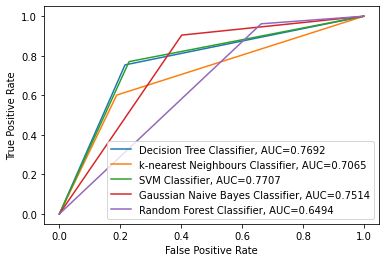

In [31]:
plt.figure(0).clf()

fpr, tpr, _ = metrics.roc_curve(Y2_test,  Y2_preds_dtc)
auc = round(metrics.roc_auc_score(Y2_test, Y2_preds_dtc), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y2_test,  Y2_preds_knn)
auc = round(metrics.roc_auc_score(Y2_test, Y2_preds_knn), 4)
plt.plot(fpr,tpr,label="k-nearest Neighbours Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y2_test,  Y2_preds_svm)
auc = round(metrics.roc_auc_score(Y2_test, Y2_preds_svm), 4)
plt.plot(fpr,tpr,label="SVM Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y2_test,  Y2_preds_gnb)
auc = round(metrics.roc_auc_score(Y2_test, Y2_preds_gnb), 4)
plt.plot(fpr,tpr,label="Gaussian Naive Bayes Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(Y2_test,  Y2_preds_rfc)
auc = round(metrics.roc_auc_score(Y2_test, Y2_preds_rfc), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

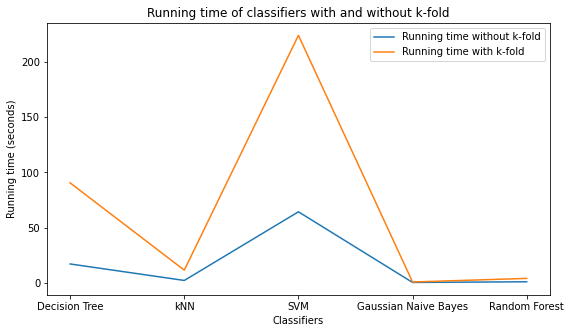

In [32]:
models = ["Decision Tree", "kNN", "SVM", "Gaussian Naive Bayes", "Random Forest"]

run_time = [time_dtc, time_knn, time_svm, time_gnb, time_rfc]
run_time_kfold = [time_dtc_kfold, time_knn_kfold, time_svm_kfold, time_gnb_kfold, time_rfc_kfold]
plt.figure(figsize = (9,5))
plt.plot(models, run_time, label='Running time without k-fold')
plt.plot(models, run_time_kfold, label='Running time with k-fold')

plt.xlabel("Classifiers")
plt.ylabel("Running time (seconds)")
plt.title("Running time of classifiers with and without k-fold")
plt.legend()
plt.show()

In [33]:
print(run_time)
print(run_time_kfold)

[16.949828147888184, 1.996196985244751, 64.23235893249512, 0.19103574752807617, 0.797720193862915]
[90.44258093833923, 11.33510684967041, 224.20218205451965, 0.5893990993499756, 3.867121934890747]


In [34]:
accuracy_array=[[accuracy_dtc, accuracy_knn, accuracy_svm, accuracy_gnb, accuracy_rfc],
[np.mean(score_d['test_accuracy']), np.mean(score_knn['test_accuracy']), np.mean(score_svm['test_accuracy']), np.mean(score_gnb['test_accuracy']), np.mean(score_rfc['test_accuracy'])]]
print(accuracy_array)

[[0.76925, 0.707, 0.77075, 0.75075, 0.648], [0.75915, 0.7023999999999999, 0.7726, 0.75295, 0.6402500000000001]]


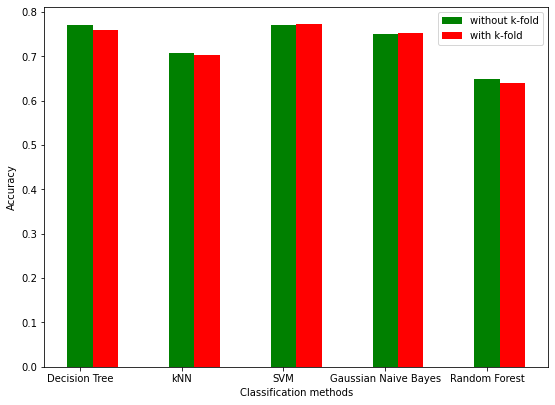

In [35]:
X = np.arange(5)
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
plt.ylabel('Accuracy')
plt.xlabel('Classification methods')
plt.xticks(np.arange(0, 1, step=2))  # Set label locations.
plt.xticks(np.arange(5), ['Decision Tree', 'kNN', 'SVM', 'Gaussian Naive Bayes', 'Random Forest']) 
ax.bar(X + 0.00, accuracy_array[0], color = 'g', width = 0.25, label ='without k-fold')
ax.bar(X + 0.25, accuracy_array[1], color = 'r', width = 0.25, label ='with k-fold')
plt.legend()

In [36]:
precision_array=[[precision_dtc, precision_knn, precision_svm, precision_gnb, precision_rfc],
[np.mean(score_d['test_precision']), np.mean(score_knn['test_precision']), np.mean(score_svm['test_precision']), np.mean(score_gnb['test_precision']), np.mean(score_rfc['test_precision'])]]
print(precision_array)

[[0.7761116856256464, 0.76, 0.769307923771314, 0.6905674846625767, 0.5897751770865414], [0.7740509259718067, 0.7173750486787429, 0.778462915282968, 0.6925342754923276, 0.7243351938596159]]


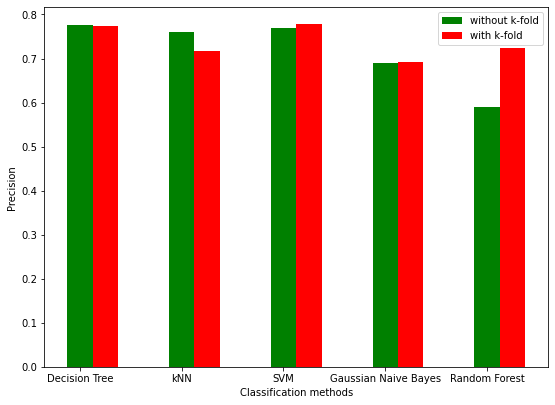

In [37]:
X = np.arange(5)
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
plt.ylabel('Precision')
plt.xlabel('Classification methods')
plt.xticks(np.arange(0, 1, step=2))  # Set label locations.
plt.xticks(np.arange(5), ['Decision Tree', 'kNN', 'SVM', 'Gaussian Naive Bayes', 'Random Forest']) 
ax.bar(X + 0.00, precision_array[0], color = 'g', width = 0.25, label ='without k-fold')
ax.bar(X + 0.25, precision_array[1], color = 'r', width = 0.25, label ='with k-fold')
plt.legend()

In [38]:
recall_array=[[recall_dtc, recall_knn, recall_svm, recall_gnb, recall_rfc],
[np.mean(score_d['test_recall']), np.mean(score_knn['test_recall']), np.mean(score_svm['test_recall']), np.mean(score_gnb['test_recall']), np.mean(score_rfc['test_recall'])]]
print(recall_array)

[[0.7538925163234556, 0.6012054244098443, 0.7704671019588146, 0.904570567553993, 0.9618282270215972], [0.7322162487143483, 0.6702408532078342, 0.7622281288865663, 0.9100964436235701, 0.7094909435857851]]


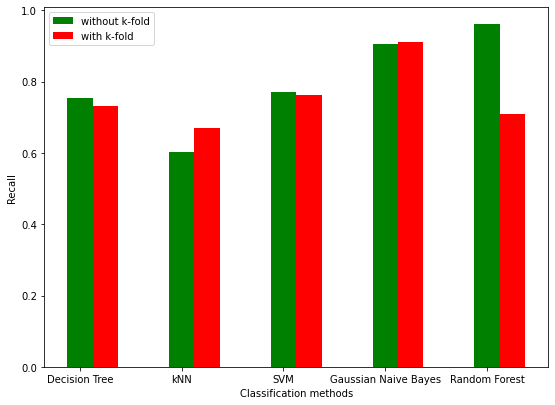

In [39]:
X = np.arange(5)
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
plt.ylabel('Recall')
plt.xlabel('Classification methods')
plt.xticks(np.arange(0, 1, step=2))  # Set label locations.
plt.xticks(np.arange(5), ['Decision Tree', 'kNN', 'SVM', 'Gaussian Naive Bayes', 'Random Forest']) 
ax.bar(X + 0.00, recall_array[0], color = 'g', width = 0.25, label ='without k-fold')
ax.bar(X + 0.25, recall_array[1], color = 'r', width = 0.25, label ='with k-fold')
plt.legend()

In [40]:
f1_score_array=[[f1_score_dtc, f1_score_knn, f1_score_svm, f1_score_gnb, f1_score_rfc],
[np.mean(score_d['test_f1_score']), np.mean(score_knn['test_f1_score']), np.mean(score_svm['test_f1_score']), np.mean(score_gnb['test_f1_score']), np.mean(score_rfc['test_f1_score'])]]
print(f1_score_array)

[[0.7648407643312103, 0.6713404374649468, 0.7698870765370138, 0.7832137421178517, 0.7311951126384115], [0.7524590927341104, 0.6922497696164329, 0.7701528464348169, 0.7864546460098988, 0.6233554606785974]]


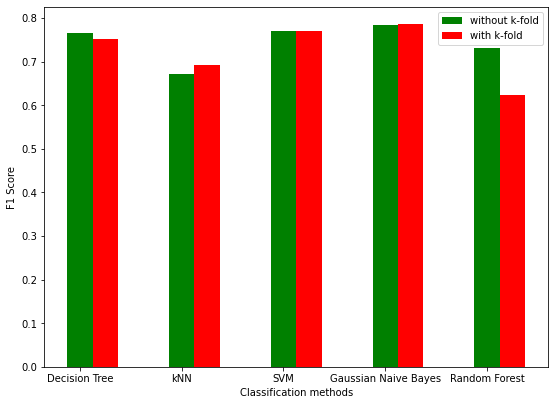

In [41]:
X = np.arange(5)
fig = plt.figure(figsize = (7,5))
ax = fig.add_axes([0,0,1,1])
plt.ylabel('F1 Score')
plt.xlabel('Classification methods')
plt.xticks(np.arange(0, 1, step=2))  # Set label locations.
plt.xticks(np.arange(5), ['Decision Tree', 'kNN', 'SVM', 'Gaussian Naive Bayes', 'Random Forest']) 
ax.bar(X + 0.00, f1_score_array[0], color = 'g', width = 0.25, label ='without k-fold')
ax.bar(X + 0.25, f1_score_array[1], color = 'r', width = 0.25, label ='with k-fold')
plt.legend()